In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
Data = pd.read_csv('Data(2).csv')
Data.head(15)

,Label,HI1,HI3,HI5,HI7,HI9,HI11,HI13,HI15,HI17,HI19,HI21,HI23,HI25,HI27,HI29,HI31
0,Kipas,98.46,2.85,1.67,3.19,2.27,2.26,4.23,0.72,1.48,1.70,2.50,2.77,2.64,9.52,6.86,9.56
1,Kipas,98.75,6.50,1.33,3.66,2.22,0.82,2.52,3.61,9.19,3.64,5.54,4.35,2.99,2.30,1.83,1.30
2,Kipas,99.16,6.10,2.99,4.37,0.81,3.20,2.26,4.71,4.69,1.91,0.45,1.78,3.17,1.39,1.12,4.68
3,Kipas,99.20,4.85,3.84,3.14,1.83,1.92,1.73,6.11,2.48,4.95,1.76,1.56,3.95,2.27,2.32,0.98
4,Kipas,99.44,4.34,1.54,4.34,2.50,0.72,3.19,3.61,3.84,2.99,1.76,1.14,1.83,2.77,0.96,1.33
5,Kipas,99.84,4.76,1.72,1.19,0.79,0.45,0.33,0.00,1.06,0.74,0.83,0.38,0.47,1.00,0.80,0.00
6,Kipas,99.71,4.17,1.25,1.64,1.41,1.77,1.89,1.34,0.00,2.31,2.34,2.13,2.41,1.22,1.22,2.54
7,Kipas,99.77,4.13,2.10,2.83,0.41,1.52,1.11,1.04,1.87,0.98,1.20,1.07,4.97,4.62,1.50,0.70
8,Kipas,99.48,7.46,3.84,1.67,1.22,1.75,1.67,1.54,1.44,1.22,7.69,5.69,2.99,1.44,3.86,2.84
9,Kipas,99.52,5.75,0.98,1.32,1.39,2.40,1.54,20.01,20.84,36.69,19.02,25.06,0.00,0.00,0.00,0.00


In [ ]:
Data.shape

(876, 17)

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Label   876 non-null    object 
 1   HI1     876 non-null    float64
 2   HI3     876 non-null    float64
 3   HI5     876 non-null    float64
 4   HI7     876 non-null    float64
 5   HI9     876 non-null    float64
 6   HI11    876 non-null    float64
 7   HI13    876 non-null    float64
 8   HI15    876 non-null    float64
 9   HI17    876 non-null    float64
 10  HI19    876 non-null    float64
 11  HI21    876 non-null    float64
 12  HI23    876 non-null    float64
 13  HI25    876 non-null    float64
 14  HI27    876 non-null    float64
 15  HI29    876 non-null    float64
 16  HI31    876 non-null    float64
dtypes: float64(16), object(1)
memory usage: 116.5+ KB


In [ ]:
Data['Label'].unique() 

array(['Kipas', 'Kosong', 'Pemanas Air', 'Blender', 'Hairdryer',
       'HairdryerBlender', 'HairdryerKipas', 'HairdryerPemanas Air',
       'BlenderPemanas Air', 'BlenderKipas', 'Pemanas AirKipas',
       'HairdryerBlenderKipas', 'HairdryerBlenderPemanas Air',
       'BlenderPemanas AirKipas', 'Pemanas AirKipasHairdryer',
       'KipasPemanas AirBlenderHairdryer'], dtype=object)

In [ ]:
#Data.plot.hist(subplots=True, layout=(12,2), figsize=(30, 25), bins=20)
#plt.show()

In [ ]:
#sns.scatterplot(data=Data)

In [ ]:
#sns.lineplot(data=Data.drop(['Label'], axis=1))

In [ ]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
Data['Label']= label_encoder.fit_transform(Data['Label']) 
  
Data['Label'].unique() 

array([10, 12, 13,  0,  4,  5,  8,  9,  2,  1, 14,  6,  7,  3, 15, 11])

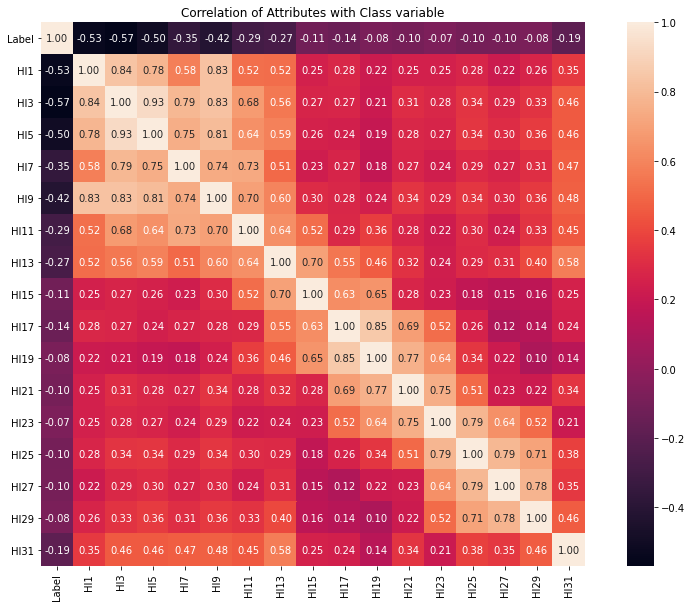

In [ ]:
correlation = Data.corr()
plt.figure(figsize=(15,10))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=0)           
plt.show()

In [ ]:
correlation['Label'].sort_values(ascending=False)

Label    1.000000
HI23    -0.069509
HI29    -0.081364
HI19    -0.083689
HI21    -0.095210
HI27    -0.096605
HI25    -0.098789
HI15    -0.109463
HI17    -0.136924
HI31    -0.185010
HI13    -0.271395
HI11    -0.288108
HI7     -0.354918
HI9     -0.416455
HI5     -0.499690
HI1     -0.534225
HI3     -0.568998
Name: Label, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
#X = Data[['HI1','HI3','HI5','HI9']]
X = Data[['HI1', 'HI3', 'HI5','HI7', 'HI9','HI11','HI13','HI15','HI17','HI19','HI21','HI23','HI25','HI27','HI29','HI31']]
y = Data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)
X_train.shape, X_test.shape

((657, 16), (219, 16))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_test)
y_pred

array([12, 12, 12, 12,  0, 12,  3,  1,  3, 12,  1,  4,  2, 12, 12,  4, 10,
        0, 12, 12, 12, 12,  4, 12, 12,  0, 12,  1, 12, 12, 12, 12, 13, 12,
       12, 11, 12,  7,  3, 12,  8, 11, 12,  1,  7,  7, 12,  4, 12, 12, 12,
       12, 12, 12, 12, 12,  5, 12, 12,  1,  5, 12, 12, 12, 12, 12, 13, 12,
        7, 12,  1, 14, 12, 12, 12, 12,  5, 12, 14,  4, 12, 12, 14, 12,  3,
       15, 12, 12,  7, 12, 12, 12, 12, 12,  5, 12, 12, 12, 12, 12, 12,  8,
        1, 12, 12,  9, 12, 12,  9, 12, 12, 12,  0, 12, 12, 12, 11, 12, 12,
       12, 12, 12, 11,  7, 12, 12,  9, 12,  7,  8, 12, 12,  5, 12, 12, 12,
       12, 12, 12,  5, 12, 10,  1, 12,  4,  6,  7, 12, 10,  0,  4,  5,  2,
        1, 12,  5, 12, 13,  7,  3, 11,  1,  2, 12, 12, 12, 11, 12, 10, 12,
       15, 12,  5, 12,  9,  9, 12, 12, 10,  9, 12,  9,  2, 13, 12, 15, 12,
        7,  6, 12,  4, 12, 12, 12,  5, 12, 12,  4,  3, 12, 12,  9, 12, 12,
       12, 12, 12, 12, 12,  0, 12, 12, 12, 12, 12, 12, 12, 11,  5])

In [ ]:
#list(label_encoder.inverse_transform([10, 12, 13,  0,  4,  5,  8,  9,  2,  1, 14,  6,  7,  3, 15, 11]))

In [ ]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7945


In [ ]:
y_pred_train = knn.predict(X_train)

In [ ]:
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.8432
Test set score: 0.7945


In [ ]:
y_test.value_counts()

12    116
15     12
4      11
10      9
14      7
8       7
2       7
1       7
11      6
9       6
0       6
13      5
7       5
6       5
5       5
3       5
Name: Label, dtype: int64

12    116
15     12
4      11
10      9
14      7
8       7
2       7
1       7
11      6
9       6
0       6
13      5
7       5
6       5
5       5
3       5

In [ ]:
null_accuracy = (116/(116+12+11+9+7+7+7+7+6+6+6+5+5+5+5+5))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.5297


In [ ]:
error = []

# Calculating error for K values between 1 and 25
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [ ]:
#plt.figure(figsize=(12, 6))
#plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         #markerfacecolor='blue', markersize=10)
#plt.title('Error Rate K Value')
#plt.xlabel('K Value')
#plt.ylabel('Mean Error')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,30)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 


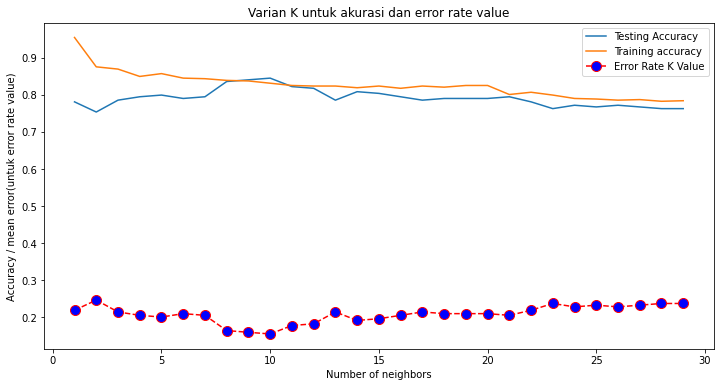

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Varian K untuk akurasi dan error rate value')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10, label = 'Error Rate K Value')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy / mean error(untuk error rate value)')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'n_neighbors':np.arange(1,40)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=10)
knn_cv.fit(X,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
knn_cv.best_score_

0.8218390804597702

In [ ]:
knn_cv.best_params_

{'n_neighbors': 9}

In [ ]:
knn_4 = KNeighborsClassifier(n_neighbors=10)


# fit the model to the training set
knn_4.fit(X_train, y_train)


# predict on the test-set
y_pred_4 = knn_4.predict(X_test)


print('Model accuracy score with k=15 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_4)))

Model accuracy score with k=15 : 0.8447


              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.70      1.00      0.82         7
           2       0.80      0.57      0.67         7
           3       0.67      0.40      0.50         5
           4       0.71      0.45      0.56        11
           5       0.57      0.80      0.67         5
           6       1.00      0.60      0.75         5
           7       0.57      0.80      0.67         5
           8       1.00      0.71      0.83         7
           9       0.33      0.50      0.40         6
          10       1.00      0.67      0.80         9
          11       0.86      1.00      0.92         6
          12       0.91      1.00      0.95       116
          13       1.00      0.60      0.75         5
          14       1.00      0.57      0.73         7
          15       1.00      0.75      0.86        12

    accuracy                           0.84       219
   macro avg       0.80   

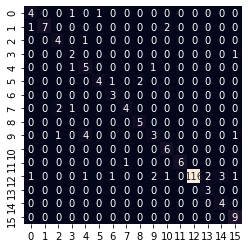

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_4))
plt.figure(figsize=(6,4))
mat = confusion_matrix(y_test, y_pred_4)
sns.heatmap(mat.T, square=True , annot=True, fmt='d', cbar=False)

In [ ]:
# instantiate the model with k=23
knn_23 = KNeighborsClassifier(n_neighbors=9)


# fit the model to the training set
knn_23.fit(X_train, y_train)


# predict on the test-set
y_pred_23 = knn_23.predict(X_test)


print('Model accuracy score with k=11 : {0:0.5f}'. format(accuracy_score(y_test, y_pred_23)))

Model accuracy score with k=11 : 0.84018


              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.70      1.00      0.82         7
           2       0.80      0.57      0.67         7
           3       0.50      0.40      0.44         5
           4       0.78      0.64      0.70        11
           5       0.57      0.80      0.67         5
           6       1.00      0.60      0.75         5
           7       0.50      0.60      0.55         5
           8       1.00      0.57      0.73         7
           9       0.43      0.50      0.46         6
          10       0.86      0.67      0.75         9
          11       0.86      1.00      0.92         6
          12       0.91      1.00      0.95       116
          13       0.75      0.60      0.67         5
          14       1.00      0.43      0.60         7
          15       0.90      0.75      0.82        12

    accuracy                           0.84       219
   macro avg       0.77   

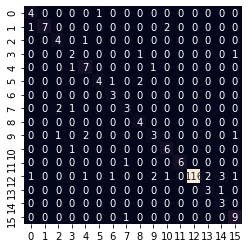

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score

print(classification_report(y_test, y_pred_23))
plt.figure(figsize=(6,4))
mat = confusion_matrix(y_test, y_pred_23)
sns.heatmap(mat.T, square=True , annot=True, fmt='d', cbar=False)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn_4, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.83333333 0.84848485 0.83333333 0.75757576 0.78787879 0.74242424
 0.78787879 0.8        0.76923077 0.8       ]


In [ ]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7960


In [ ]:
Data.head()

,Label,HI1,HI3,HI5,HI7,HI9,HI11,HI13,HI15,HI17,HI19,HI21,HI23,HI25,HI27,HI29,HI31
0,10,98.46,2.85,1.67,3.19,2.27,2.26,4.23,0.72,1.48,1.70,2.50,2.77,2.64,9.52,6.86,9.56
1,10,98.75,6.50,1.33,3.66,2.22,0.82,2.52,3.61,9.19,3.64,5.54,4.35,2.99,2.30,1.83,1.30
2,10,99.16,6.10,2.99,4.37,0.81,3.20,2.26,4.71,4.69,1.91,0.45,1.78,3.17,1.39,1.12,4.68
3,10,99.20,4.85,3.84,3.14,1.83,1.92,1.73,6.11,2.48,4.95,1.76,1.56,3.95,2.27,2.32,0.98
4,10,99.44,4.34,1.54,4.34,2.50,0.72,3.19,3.61,3.84,2.99,1.76,1.14,1.83,2.77,0.96,1.33


In [ ]:
new1 = knn_4.predict([[98.46, 2.86,1.67,3.19,2.27,2.26, 4.23,0.72,1.48,1.7,2.5,2.77,2.64,9.52,6.86,9.56]])
print('Hasil prediksi 1:', label_encoder.inverse_transform(new1))

Hasil prediksi 1: ['Kipas']


In [ ]:
new1 = knn_4.predict([[99.87, 4.19,1.94,1.08,1.29,0.77, 0.52,0.43,0.44,0.59,0.69,0.57,0.4,0,0.35,0.34]])
print('Hasil prediksi 1:', label_encoder.inverse_transform(new1))
#Pemanas AirKipasHairdryer #800
new2 = knn_4.predict([[98.46, 2.86,1.67,3.19,2.27,2.26, 4.23,0.72,1.48,1.7,2.5,2.77,2.64,9.52,6.86,9.56]])
print('Hasil prediksi 2:', label_encoder.inverse_transform(new2))
#KIPAS #1
new3 = knn_4.predict([[99.9, 3.1,2.13,1.06,0.96,0.98, 0.73,0.3,0.76,0.57,0.43,0.44,0.54,0.3,0.46,0.73]])
print('Hasil prediksi 3:', label_encoder.inverse_transform(new3))
#Hairdryer #189
new4 = knn_4.predict([[99.9, 3.62,1.89,1.02,1.23,0.32, 0,0,0.54,0.34,0.43,0.45,0,0.48,0.55,0]])
print('Hasil prediksi 4:', label_encoder.inverse_transform(new4))
#BlenderPemanas Air #420

new5 = knn_4.predict([[99.9, 3.58,1.31,1.34,1.35,0.75, 0.74,0.63,0.5,0.42,0,0.39,0,0,0,0]])
print('Hasil prediksi 5:', label_encoder.inverse_transform(new5))
#pemanas Air #85
new6 = knn_4.predict([[99.38, 9.38,3.17,2.45,0.64,1.76, 0,0.7,0.84,1.42,2.11,2.36,1.41,0.55,0.82,0.4]])
print('Hasil prediksi 6:', label_encoder.inverse_transform(new6))
#Blender #162
new7 = knn_4.predict([[99.84, 4.72,2.49,1.33,0.89,0.34, 0.51,0,0.65,0.4,0,0,0.5,0.39,0,0]])
print('Hasil prediksi 7:', label_encoder.inverse_transform(new7))
#HairdryerBlenderr #227

new8 = knn_4.predict([[99.82, 4.31,2.38,1.43,1.63,0.69, 1.18,0.65,1.4,0.84,0.44,0.5,0.36,0.32,0.67,0]])
print('Hasil prediksi 8:', label_encoder.inverse_transform(new8))
#HairdryerKipas #297
new9 = knn_4.predict([[99.9, 3.61,1.81,1.02,1.17,0.65, 0.53,0.41,0.31,0.42,0,0,0.36,0,0,0]])
print('Hasil prediksi 9:', label_encoder.inverse_transform(new9))
#HairdryerPemanas Air #360
new10 = knn_4.predict([[99.89, 3.62,1.64,1.25,1.17,1, 0.44,0.87,0,0.31,0,0.34,0,0.52,0,0]])
print('Hasil prediksi 10:', label_encoder.inverse_transform(new10))
#BlenderPemanas Air #394

new11 = knn_4.predict([[99.49, 7.73,2.7,3.15,1.66,0.36, 0.52,0.66,3.52,1.72,0.79,1.91,0,1.27,0,0.53]])
print('Hasil prediksi 11:', label_encoder.inverse_transform(new11))
#BlenderKipas #458
new12 = knn_4.predict([[99.85, 4.62,1.6,1.29,1.35,0.68, 0.45,0.3,0.76,0.46,0,0.37,0,0,0.39,0]])
print('Hasil prediksi 12:', label_encoder.inverse_transform(new12))
#Pemanas AirKipas #509
new13 = knn_4.predict([[99.77, 4.97,2.79,2.03,1.48,0.89,0.77,0.55,1.6,0.72,0.92,0,0.68,0.49,0,0.38]])
print('Hasil prediksi 13:', label_encoder.inverse_transform(new13))
#HairdryerBlenderKipasr #564

new14 = knn_4.predict([[99.87, 4.09,2.07,0.93,1.4,0.56, 0.51,0.62,0.43,0,0.45,0.42,0,0,0,0.35]])
print('Hasil prediksi 14:', label_encoder.inverse_transform(new14))
#Pemanas AirKipasHairdryer #769
new15 = knn_4.predict([[99.87, 4.27,2.09,1.09,1.23,0.57, 0.4,0,0.55,0.56,0,0.37,0,0,0,0]])
print('Hasil prediksi 15:', label_encoder.inverse_transform(new15))
#KipasPemanas AirBlenderHairdryer #865
new16 = knn_4.predict([[99.18, 9.95,4.53,3.89,0.9,1.7, 2,1.21,1.94,1.67,1.9,2.16,1.16,0.71,1.62,0.85]])
print('Hasil prediksi 16:', label_encoder.inverse_transform(new16))
#Blender #125

new17 = knn_4.predict([[99.91, 2.79,2.33,0.81,1.4,0.71, 0.3,0.49,0.41,0,0,0.47,0,0,0.3,0]])
print('Hasil prediksi 17:', label_encoder.inverse_transform(new17))
#Hairdryer #190
new18 = knn_4.predict([[99.83, 3.6,2.42,1.6,1.28,0.7,0.63,0.62,1.14,1.92,1.54,1.03,0.91,0.55,0.48,0.76]])
print('Hasil prediksi 18:', label_encoder.inverse_transform(new18))
#HairdryerKipas #309
new19 = knn_4.predict([[99.43, 7.75,3.16,2.57,3.12,1.26,0.79,0.98,0.69,0.85,3.34,2.17,1.24,1.23,1.48,1.22]])
print('Hasil prediksi 19:', label_encoder.inverse_transform(new19))
#Kipas #62
new20 = knn_4.predict([[99.82, 4.43,2.6,1.28,1.82,1.1, 0.66,0.99,0.31,0.94,0.46,0.7,0.5,0.49,0.31,0]])
print('Hasil prediksi 20:', label_encoder.inverse_transform(new20))
#HairdryerKipas #279
new21 = knn_4.predict([[0,0,0,0,0,0, 0,0,0,0,0,0,0,0,0,0]])
print('Hasil prediksi 21:', label_encoder.inverse_transform(new21))
#KOSONG

new22 = knn_4.predict([[99.71,4.17,1.25,1.64,1.41,1.77,1.89,1.34,0,2.31,2.34,2.13,2.41,1.22,1.22,2.54]])
print('Hasil prediksi 22:', label_encoder.inverse_transform(new22))
#Kipas #8
new23 = knn_4.predict([[99.2,7.5,5.69,4.16,1.92,3.06,3.54,2.78,1.39,2.34,2.83,1.04,0.66,1.08,1.61,0]])
print('Hasil prediksi 23:', label_encoder.inverse_transform(new23))
#Kipas #21
new24 = knn_4.predict([[98.94 ,7.14 ,2.37 ,6.09 ,3.21 ,1.99 ,1.15 ,1.77 ,3.2 ,5.17 ,5.44 ,1.07 ,3.41 ,0.34 ,2.67 ,3.38]])
print('Hasil prediksi 24:', label_encoder.inverse_transform(new24))
#Kipas #53
new25 = knn_4.predict([[99.88 ,3.67 ,1.24 ,1.53 ,1.24 ,0.75 ,0.93 ,0.61 ,1.14 ,0.66 ,0.64 ,0 ,0.4 ,0 ,0 ,0.36]])
print('Hasil prediksi 25:', label_encoder.inverse_transform(new25))
#Pemanas Air #76
new26 = knn_4.predict([[99.89 ,4.02 ,1.39 ,1.1 ,1.26 ,0.71 ,0.48 ,0 ,0.48 ,0.42 ,0 ,0.54 ,0.38 ,0 ,0 ,0.38]])
print('Hasil prediksi 26:', label_encoder.inverse_transform(new26))
#Pemanas Air #84
new27 = knn_4.predict([[99.89 ,4.02 ,1.26 ,1.04 ,1.14 ,0.47 ,0.61 ,0 ,0 ,0.53 ,0.8 ,0.36 ,0 ,0 ,0.44 ,0]])
print('Hasil prediksi 27:', label_encoder.inverse_transform(new27))
#Pemanas Air #92
new28 = knn_4.predict([[99.89 ,3.98 ,1.27 ,1.4 ,1.24 ,0.57 ,0.47 ,0.49 ,0.55 ,0 ,0 ,0.42 ,0.56 ,0 ,0 ,0.41]])
print('Hasil prediksi 28:', label_encoder.inverse_transform(new28))
#Pemanas Air #101
new29 = knn_4.predict([[99.32 ,8.15 ,4.18 ,2.46 ,1.65 ,1.58 ,1.39 ,0.52 ,1.91 ,2.99 ,3.37 ,2.99 ,1.95 ,1.06 ,0.65 ,0.91]])
print('Hasil prediksi 29:', label_encoder.inverse_transform(new29))
#Blender #133
new30 = knn_4.predict([[99.55 ,8.5 ,2.13 ,2.19 ,1.4 ,1 ,0.78 ,0.61 ,0.86 ,0.91 ,1.05 ,0.71 ,0.49 ,0.71 ,0.61 ,0.45]])
print('Hasil prediksi 30:', label_encoder.inverse_transform(new30))
#Blender #142
new31 = knn_4.predict([[99.4 ,8.72 ,3.18 ,2.51 ,1.7 ,1.98 ,0.62 ,0.65 ,1.87 ,1.58 ,3.06 ,1.76 ,0.52 ,0.45 ,0.57 ,0.78]])
print('Hasil prediksi 31:', label_encoder.inverse_transform(new31))
#Blender #152

new32 = knn_4.predict([[99.9 ,3.26 ,2.22 ,0.62 ,1.25 ,1.03 ,0.48 ,0.56 ,0.69 ,0 ,0.39 ,1.1 ,1.37 ,0.48 ,0 ,0.69]])
print('Hasil prediksi 32:', label_encoder.inverse_transform(new32))
#Hairdryer #177
new33 = knn_4.predict([[99.86 ,2.75 ,2.07 ,1.25 ,1.84 ,0.96 ,0.53 ,0.68 ,1.43 ,1.17 ,0.59 ,1.92 ,0 ,0.52 ,1.11 ,0.52]])
print('Hasil prediksi 33:', label_encoder.inverse_transform(new33))
#KHairdryer #181
new34 = knn_4.predict([[99.88 ,3.28 ,1.98 ,0.89 ,1.12 ,0 ,0.88 ,0.46 ,0.73 ,0.65 ,1.18 ,0.98 ,0.87 ,0.95 ,0.76 ,0.71]])
print('Hasil prediksi 34:', label_encoder.inverse_transform(new34))
#Hairdryer #188
new35 = knn_4.predict([[99.9 ,3.02 ,2.17 ,1.08 ,0.37 ,0.43 ,0.81 ,1.12 ,0.92 ,0.62 ,1.15 ,0.46 ,0.55 ,0.31 ,0 ,0.56]])
print('Hasil prediksi 35:', label_encoder.inverse_transform(new35))
#Hairdryer #206
new36 = knn_4.predict([[99.8 ,4.94 ,2.55 ,1.42 ,1.39 ,0.41 ,0.46 ,0.73 ,1.83 ,0.39 ,0.52 ,0.53 ,0.46 ,0 ,0 ,0.53]])
print('Hasil prediksi 36:', label_encoder.inverse_transform(new36))
#HairdryerBlender #228
new37 = knn_4.predict([[99.85 ,4.43 ,2.22 ,1.08 ,0.79 ,0.61 ,0.62 ,0.43 ,1.08 ,0.72 ,0.31 ,0.78 ,0.74 ,0 ,0 ,0.33]])
print('Hasil prediksi 37:', label_encoder.inverse_transform(new37))
#HairdryerBlender #237
new38 = knn_4.predict([[99.83 ,4.36 ,2.89 ,0.96 ,1.47 ,0 ,0.62 ,0.53 ,1.37 ,0.68 ,0.38 ,0.41 ,0 ,0.32 ,0.48 ,0.59]])
print('Hasil prediksi 38:', label_encoder.inverse_transform(new38))
#HairdryerBlender #246
new39 = knn_4.predict([[99.81 ,4.22 ,2.76 ,1.62 ,1.3 ,0.34 ,1.21 ,0.83 ,1.53 ,0.85 ,0.54 ,0.71 ,0 ,0.63 ,0 ,0.91]])
print('Hasil prediksi 39:', label_encoder.inverse_transform(new39))
#HairdryerKipas #288
new40 = knn_4.predict([[99.84 ,4.2 ,2.9 ,1.35 ,1.37 ,0.32 ,0.65 ,0.46 ,0 ,0.73 ,0.7 ,0 ,0.57 ,0.48 ,0.3 ,0.61]])
print('Hasil prediksi 40:', label_encoder.inverse_transform(new40))
#HairdryerKipas #319
new41 = knn_4.predict([[99.87 ,3.96 ,2 ,1.1 ,1.47 ,0.78 ,0.58 ,0.54 ,0.58 ,0.51 ,0 ,0.47 ,0.34 ,0 ,0.36 ,0.31]])
print('Hasil prediksi 41:', label_encoder.inverse_transform(new41))
#HairdryerPemanasAir #334

new42 = knn_4.predict([[99.9 ,3.63 ,1.83 ,0.98 ,1.22 ,0.71 ,0.42 ,0.32 ,0.35 ,0.43 ,0 ,0 ,0 ,0 ,0 ,0.32]])
print('Hasil prediksi 42:', label_encoder.inverse_transform(new42))
#HairdryerPemanasAir #342
new43 = knn_4.predict([[99.9 ,3.57 ,1.8 ,1.02 ,1.19 ,0.66 ,0.4 ,0 ,0.37 ,0.49 ,0.48 ,0.53 ,0.31 ,0.32 ,0 ,0]])
print('Hasil prediksi 43:', label_encoder.inverse_transform(new43))
#HairdryerPemanasAir #370
new44 = knn_4.predict([[99.89 ,3.74 ,1.69 ,1.16 ,1.34 ,0.56 ,0 ,0.37 ,0 ,0.56 ,0.4 ,0 ,0 ,0 ,0 ,0.31]])
print('Hasil prediksi 44:', label_encoder.inverse_transform(new44))
#BlenderPemanasAir #385
new45 = knn_4.predict([[99.68 ,5.91 ,2.44 ,1.86 ,1.11 ,1.01 ,0.54 ,0.64 ,0.72 ,0.44 ,2.7 ,2.63 ,0.36 ,0.64 ,0.47 ,0.43]])
print('Hasil prediksi 45:', label_encoder.inverse_transform(new45))
#BlenderPemanasAir #405
new46 = knn_4.predict([[99.49 ,7.79 ,2.87 ,2.97 ,1.28 ,1.27 ,1.49 ,0 ,2.91 ,2.16 ,1.46 ,1.45 ,0.77 ,0 ,0.42 ,0.36]])
print('Hasil prediksi 46:', label_encoder.inverse_transform(new46))
#BlenderKipas #434
new47 = knn_4.predict([[99.51 ,8.06 ,2.98 ,2.49 ,1.43 ,1.39 ,1.17 ,0.48 ,2.36 ,1.59 ,0.92 ,1.01 ,0.43 ,0.72 ,0.65 ,0.44]])
print('Hasil prediksi 47:', label_encoder.inverse_transform(new47))
#BlenderKipas #446
new48 = knn_4.predict([[99.84 ,4.57 ,1.86 ,1.39 ,1.01 ,0.82 ,1.1 ,0.44 ,0.91 ,0.31 ,0.36 ,0.55 ,0.36 ,0 ,0 ,0.33]])
print('Hasil prediksi 48:', label_encoder.inverse_transform(new48))
#PemanasairKipas #516
new49 = knn_4.predict([[99.86 ,4.51 ,1.68 ,0.83 ,1.08 ,0.54 ,0.62 ,0.33 ,0.65 ,0.34 ,0.31 ,0.57 ,0 ,0.35 ,0.31 ,0]])
print('Hasil prediksi 49:', label_encoder.inverse_transform(new49))
#PemanasairKipas #528
new50 = knn_4.predict([[99.89 ,3.93 ,1.96 ,0.98 ,1.06 ,0.4 ,0.33 ,0.35 ,0 ,0 ,0 ,0.32 ,0 ,0 ,0.35 ,0.31]])
print('Hasil prediksi 50:', label_encoder.inverse_transform(new50))
#ALL #836
new51 = knn_4.predict([[99.87 ,4.15 ,1.96 ,0.98 ,1.23 ,0.57 ,0.51 ,0.39 ,0.68 ,0.46 ,0 ,0.51 ,0.32 ,0 ,0 ,0]])
print('Hasil prediksi 51:', label_encoder.inverse_transform(new51))
#ALL #847

Hasil prediksi 1: ['Pemanas AirKipasHairdryer']
Hasil prediksi 2: ['Kipas']
Hasil prediksi 3: ['HairdryerPemanas Air']
Hasil prediksi 4: ['BlenderPemanas Air']
Hasil prediksi 5: ['HairdryerPemanas Air']
Hasil prediksi 6: ['Blender']
Hasil prediksi 7: ['KipasPemanas AirBlenderHairdryer']
Hasil prediksi 8: ['HairdryerKipas']
Hasil prediksi 9: ['HairdryerPemanas Air']
Hasil prediksi 10: ['HairdryerPemanas Air']
Hasil prediksi 11: ['BlenderKipas']
Hasil prediksi 12: ['Pemanas AirKipas']
Hasil prediksi 13: ['HairdryerBlenderKipas']
Hasil prediksi 14: ['Pemanas AirKipasHairdryer']
Hasil prediksi 15: ['KipasPemanas AirBlenderHairdryer']
Hasil prediksi 16: ['Blender']
Hasil prediksi 17: ['HairdryerPemanas Air']
Hasil prediksi 18: ['Hairdryer']
Hasil prediksi 19: ['Blender']
Hasil prediksi 20: ['HairdryerKipas']
Hasil prediksi 21: ['Kosong']
Hasil prediksi 22: ['HairdryerKipas']
Hasil prediksi 23: ['Kipas']
Hasil prediksi 24: ['Kipas']
Hasil prediksi 25: ['Pemanas Air']
Hasil prediksi 26: ['Pem

In [ ]:
from sklearn.externals import joblib

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
joblib.dump(knn_4, 'ModelKNN.pkl')

['ModelKNN.pkl']

In [ ]:
knn_from_joblib=joblib.load("ModelKNN.pkl")

In [ ]:

knn_from_joblib.predict(X_test) 

array([12, 12, 12, 12,  1, 12, 11,  1, 15, 12,  1,  4,  2, 12, 12,  4, 10,
        0, 12, 12, 12, 12,  9, 12, 12,  0, 12,  1, 12, 12, 12, 12, 13, 12,
       12, 11, 12,  2,  8, 12,  8, 11, 12,  1,  7,  7, 12,  4, 12, 12, 12,
       12, 12, 12, 12, 12,  5, 12, 12,  1,  6, 12, 12, 12, 12, 12, 13, 12,
       15, 12,  0, 14, 12, 12, 12, 12,  5, 12, 14,  4, 12, 12, 14, 12,  3,
        9, 12, 12, 15, 12, 12, 12, 12, 12,  5, 12, 12, 12, 12, 12, 12, 10,
        1, 12, 12,  9, 12, 12,  9, 12, 12, 12,  0, 12, 12, 12, 11, 12, 12,
       12, 12, 12, 11,  7, 12, 12,  9, 12, 15,  8, 12, 12,  5, 12, 12, 12,
       12, 12, 12,  4, 12, 10,  1, 12,  9,  6,  7, 12, 10,  0,  4,  5,  2,
        1, 12,  5, 12, 13,  7,  3, 11,  1,  2, 12, 12, 12, 11, 12, 10, 12,
       15, 12,  5, 12, 15, 15, 12, 12, 10,  9, 12,  9,  2, 14, 12, 15, 12,
        7,  6, 12,  9, 12, 12, 12,  8, 12, 12,  4,  3, 12, 12, 15, 12, 12,
       12, 12, 12, 12, 12,  0, 12, 12, 12, 12, 12, 12, 12,  7,  8])

In [ ]:
newload = knn_from_joblib.predict([[98.46, 2.86,1.67,3.19,2.27,2.26, 4.23,0.72,1.48,1.7,2.5,2.77,2.64,9.52,6.86,9.56]])
print('Hasil prediksi 1:', label_encoder.inverse_transform(newload))

Hasil prediksi 1: ['Kipas']
